In [1]:
import pandas as panda
import matplotlib
from matplotlib import pyplot as plot
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import datetime





In [2]:
data = ['TurId','Dato','Fylke','Område','Kommune','Holdeplass_Fra',
             'Holdeplass_Til','Linjetype','Linjefylke','Linjenavn',
             'Linjeretning','Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra',
             'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra',
             'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra',
             'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra',
             'Kjøretøy_Kapasitet','Passasjerer_Ombord']

In [3]:
dataframe = panda.read_csv("C:/Users/Beck/Intro_to_AI/assignment1/Ruter_data.csv", sep=';',engine='python', encoding='UTF-8',names=data)

In [4]:
dataframe.drop([0], inplace = True) 
  

In [5]:
dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
1,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0.0,10:53:53,10:53:59,10:53:00,10:53:00,112.0,5.0
2,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0.0,13:12:20,13:12:26,13:12:00,13:12:00,112.0,5.0
3,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0.0,10:18:56,10:19:21,10:19:00,10:19:00,112.0,6.0
4,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1.0,13:52:04,13:52:26,13:51:00,13:51:00,112.0,10.0
5,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1.0,07:34:13,07:34:53,07:33:00,07:33:00,112.0,10.0


In [6]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


Changed "Kjøretøy_kapasitet" to "Kjoretoy_kapasitet" in "Ruter_data.csv" file, because of language error.

In [7]:
dataframe.shape

(6000, 17)

In [8]:
dataframe.isnull().any()

TurId                                        False
Dato                                         False
Fylke                                        False
Område                                       False
Kommune                                      False
Holdeplass_Fra                               False
Holdeplass_Til                               False
Linjetype                                    False
Linjefylke                                   False
Linjenavn                                    False
Linjeretning                                 False
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     False
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      False
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    False
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     False
Kjøretøy_Kapasitet                           False
Passasjerer_Ombord                           False
dtype: bool

In [9]:
dataframe.nunique()

TurId                                        5953
Dato                                           90
Fylke                                           2
Område                                          4
Kommune                                        34
Holdeplass_Fra                               1632
Holdeplass_Til                               1638
Linjetype                                       4
Linjefylke                                      2
Linjenavn                                     150
Linjeretning                                    2
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     5677
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      5749
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    1201
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     1201
Kjøretøy_Kapasitet                             18
Passasjerer_Ombord                             70
dtype: int64

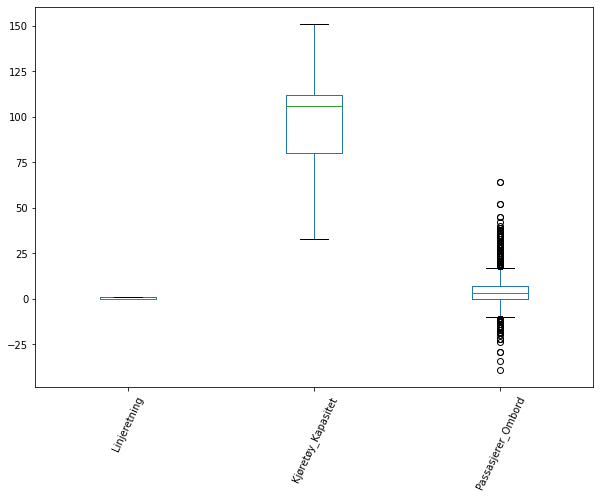

In [10]:
boxplot = dataframe.boxplot(grid=False,rot=65,figsize=(10,7));

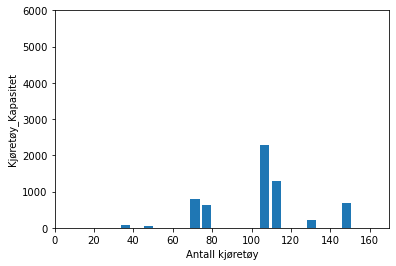

In [11]:
plot.hist(dataframe.Kjøretøy_Kapasitet,  bins=20, rwidth=0.8)
plot.ylabel('Kjøretøy_Kapasitet')
plot.xlabel('Antall kjøretøy')
plot.xlim ([0.0,170.0])
plot.ylim([0.0,6000])
plot.show()

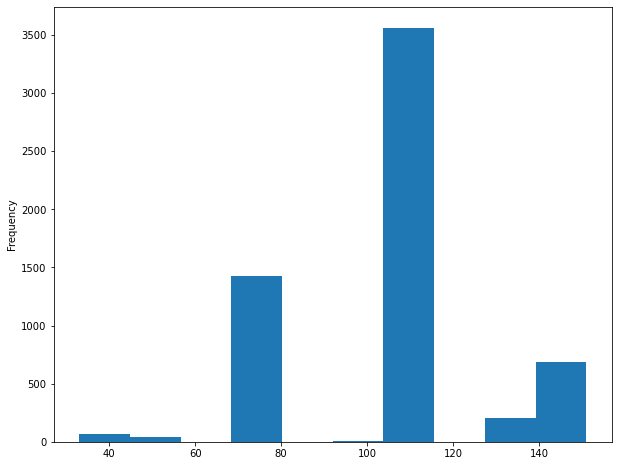

In [12]:
dataframe['Kjøretøy_Kapasitet'].plot.hist(bins=10,figsize=(10,8));

In [13]:
thresold_max = dataframe['Kjøretøy_Kapasitet'].quantile(0.90)
thresold_max

151.0

In [14]:
thresold_min = dataframe['Kjøretøy_Kapasitet'].quantile(0.10) 
thresold_min

72.0

In [15]:
dataframe[dataframe['Kjøretøy_Kapasitet']<thresold_min]

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
17,43111-2020-06-16T07:12:00+02:00,16/06/2020,Viken,Nordøst,Ullensaker,Furuset,Furuset kirke,Skole,Viken,3772,0.0,07:22:42,07:22:46,07:23:00,07:23:00,71.0,6.0
53,6003-2020-06-03T13:55:00+02:00,03/06/2020,Oslo,Indre By,Gamle Oslo,Kampen park (mot Tøyen),Kampen (mot Tøyen),Lokal,Oslo,60,1.0,14:20:06,14:20:36,14:19:00,14:19:00,33.0,3.0
56,6003-2020-07-08T07:55:00+02:00,08/07/2020,Oslo,Nordøst,Bjerke,Økernbråten (i Brobekkveien),Øvre Risløkka (mot Kroklia),Lokal,Oslo,60,1.0,08:02:10,08:02:16,08:01:00,08:01:00,33.0,1.0
57,6002-2020-06-09T06:32:00+02:00,09/06/2020,Oslo,Nordøst,Bjerke,Kroklia (mot Økernbråten),Øvre Risløkka (mot Refstadveien),Lokal,Oslo,60,0.0,07:06:59,07:07:07,07:12:00,07:12:00,33.0,0.0
66,27058-2020-08-19T08:35:00+02:00,19/08/2020,Viken,Vest,Asker,Jørgens vei (Gullhella),Eid,Lokal,Viken,285,1.0,08:51:55,08:52:00,08:51:00,08:51:00,70.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5939,4605-2020-08-09T21:02:00+02:00,09/08/2020,Oslo,Vest,Vestre Aker,Borgen (mot Smestad),Heggeli (mot Smestad),Lokal,Oslo,45,1.0,21:04:19,21:04:24,21:04:00,21:04:00,71.0,13.0
5943,4601-2020-07-09T13:31:00+02:00,09/07/2020,Oslo,Vest,Vestre Aker,Holmendammen (mot Smestad),Bernhard Herres vei (mot Smestad),Lokal,Oslo,45,0.0,13:45:06,13:45:11,13:43:00,13:43:00,71.0,7.0
5946,4601-2020-08-25T13:46:00+02:00,25/08/2020,Oslo,Vest,Vestre Aker,Holmendammen (mot Smestad),Bernhard Herres vei (mot Smestad),Lokal,Oslo,45,0.0,13:59:47,14:00:13,13:58:00,13:58:00,71.0,4.0
5950,4004-2020-08-27T23:31:00+02:00,27/08/2020,Oslo,Vest,Ullern,Borgen (mot Majorstuen),Volvat (mot Majorstuen),Lokal,Oslo,45,0.0,23:47:15,23:47:19,23:48:00,23:48:00,71.0,2.0


In [16]:
new_dataframe=dataframe[(dataframe['Kjøretøy_Kapasitet']<thresold_max) & (dataframe['Kjøretøy_Kapasitet']>thresold_min)]
new_dataframe.shape 

(4404, 17)